In [1]:
import math
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
def load_system_matrix(filename):
    data = scipy.io.loadmat(filename)
    K = data['K'][0]
    # format for data[0][pixel index][0]
    return K
def load_sensordata(filename):
    data = scipy.io.loadmat(filename)
    sensor_data_noisy = data['sensor_data_noisy']
    p_recorded = data['p_recorded']
    medium = data['medium']
    sensor = data['sensor']
    sensor_data = data['sensor_data']
    return sensor_data_noisy, p_recorded, medium, sensor, sensor_data

system_matrix = load_system_matrix('system_matrix.mat')
sensor_data_noisy, p_recorded, medium, sensor, sensor_data = load_sensordata('sensor_data_noisy')


The mode shapes in a rectangular domain with lengths \(L_x\) and \(L_y\) are given by:
$$
\[
\phi_{n,m}(x, y) = \sqrt{\frac{4}{L_x L_y}} \sin\left(\frac{n \pi x}{L_x}\right) \sin\left(\frac{m \pi y}{L_y}\right)
\]
$$

In [3]:
# process K for TwIST algorithm
# Process system_matrix for TwIST algorithm, ensuring rows are processed correctly
def process_K(system_matrix):
    system_matrix = np.array(system_matrix)
    two_d_array = np.empty((0, system_matrix[0].shape[1]))
    
    for row in system_matrix:
        two_d_array = np.vstack([two_d_array, row[0]])
    
    return two_d_array


system_matrix = process_K(system_matrix)


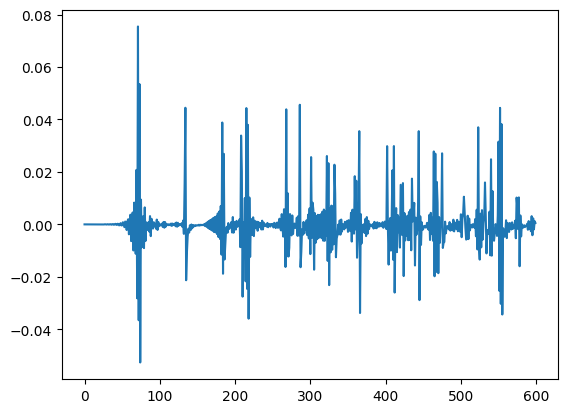

In [4]:
plt.plot(system_matrix[100]) # sensor data from the pixel index 11

In [5]:
def process_sensor_data(signal_matrix_decon):
    signal_matrix_decon = np.array(signal_matrix_decon)
    twoD_array = np.empty((0, signal_matrix_decon.shape[1]))
    for i in signal_matrix_decon:
        two_d_array = np.vstack([twoD_array, i])
    return signal_matrix_decon

sensor_data_noisy = process_sensor_data(sensor_data_noisy)
sensor_data_noisy = np.reshape(sensor_data_noisy, (sensor_data_noisy.shape[1], 1))
sensor_data = process_sensor_data(sensor_data)
sensor_data = np.reshape(sensor_data, (sensor_data.shape[1], 1))
p_recorded = process_sensor_data(p_recorded)

In [6]:
p_recorded = np.array(p_recorded)
p_recorded.shape

(600, 1)

In [7]:
sensor_data_noisy.shape

(600, 1)

In [8]:
system_matrix.shape

(192, 600)

In [9]:
import importlib.util
import os, sys

# Define the path to the TwIST.py file

sys.path.append('gitclone/Image-Restoration-Algorithm-TwIST')


from TwIST import TwIST, TwIST2

In [10]:

tau = 0.1
alpha = 1.0
beta = 0.5


# A = np.array([[0.5, 0.2, 0.1, 0.0, 0.1, 0.2, 0.1, 0.3, 0.2, 0.1],
#               [0.1, 0.7, 0.2, 0.1, 0.2, 0.1, 0.2, 0.1, 0.1, 0.3],
#               [0.3, 0.2, 0.8, 0.2, 0.1, 0.3, 0.2, 0.2, 0.3, 0.2],
#               [0.2, 0.1, 0.3, 0.7, 0.3, 0.2, 0.1, 0.1, 0.3, 0.1],
#               [0.1, 0.2, 0.1, 0.3, 0.7, 0.2, 0.3, 0.1, 0.2, 0.3],
#               [0.2, 0.1, 0.3, 0.2, 0.1, 0.8, 0.2, 0.3, 0.1, 0.2],
#               [0.3, 0.1, 0.2, 0.1, 0.2, 0.2, 0.7, 0.1, 0.3, 0.2],
#               [0.2, 0.3, 0.2, 0.1, 0.1, 0.1, 0.1, 0.8, 0.2, 0.3],
#               [0.1, 0.1, 0.3, 0.2, 0.2, 0.3, 0.1, 0.2, 0.7, 0.2],
#               [0.2, 0.3, 0.1, 0.3, 0.2, 0.1, 0.2, 0.3, 0.2, 0.8]])

# # # Define desampleConvolvedNoise (10x1)
# desampleConvolvedNoise = np.array([[0.6],
#                                    [0.9],
#                                    [1.2],
#                                    [0.8],
#                                    [0.5],
#                                    [1.1],
#                                    [0.7],
#                                    [1.3],
#                                    [0.6],
#                                    [1.0]])

# # # Define realSignal (10x1)
# realSignal = np.array([[1.0],
#                        [1.5],
#                        [2.0],
#                        [1.2],
#                        [0.8],
#                        [1.6],
#                        [1.1],
#                        [2.2],
#                        [1.0],
#                        [1.8]])

# x = TwIST(desampleConvolvedNoise, A, tau, realSignal, alpha, beta)
# x2 = TwIST2(desampleConvolvedNoise, A, tau, alpha, beta)
# print("Reconstructed signal:", x)
# print("Reconstructed signla X2:", x2)




In [11]:
# sensor_data.shape
sensor_data_noisy.shape

(600, 1)

In [12]:
# Step 1: Rotate the matrix 180 degrees
rotated_matrix = np.rot90(system_matrix, 2)

# Step 2: Transpose the rotated matrix to change its shape to (600, 192)
system_matrix = rotated_matrix.T

print(system_matrix.shape, system_matrix.shape)

(600, 192) (600, 192)


In [13]:
print(sensor_data.shape, sensor_data_noisy.shape)

(600, 1) (600, 1)


In [17]:
desampleConvolvedNoise = sensor_data_noisy
A = system_matrix
# realSignal = sensor_data
realSignal = np.ones((192, 1))

#  test matrixes
x = TwIST(desampleConvolvedNoise, A, tau, realSignal, alpha, beta)
# x = TwIST2(desampleConvolvedNoise, A, tau, alpha, beta)
print("Reconstructed signal:", x)

/Users/nontakornbunluesriruang/Documents/projects/photoacoustic_tomography/gitclone/Image-Restoration-Algorithm-TwIST/TwIST.py:41: RuntimeWarning: invalid value encountered in scalar divide
  return np.where(std_signal == 0, 0, mean_signal / std_signal)


Iteration 10: MSE = 1.0, SNR = 0.0, SAD = 192.0
Iteration 20: MSE = 1.0, SNR = 0.0, SAD = 192.0
Iteration 30: MSE = 1.0, SNR = 0.0, SAD = 192.0
Iteration 40: MSE = 1.0, SNR = 0.0, SAD = 192.0
Iteration 50: MSE = 1.0, SNR = 0.0, SAD = 192.0
Iteration 60: MSE = 1.0, SNR = 0.0, SAD = 192.0
Iteration 70: MSE = 1.0, SNR = 0.0, SAD = 192.0
Iteration 80: MSE = 1.0, SNR = 0.0, SAD = 192.0
Iteration 90: MSE = 1.0, SNR = 0.0, SAD = 192.0
Iteration 100: MSE = 1.0, SNR = 0.0, SAD = 192.0
Iteration 110: MSE = 1.0, SNR = 0.0, SAD = 192.0
Iteration 120: MSE = 1.0, SNR = 0.0, SAD = 192.0
Iteration 130: MSE = 1.0, SNR = 0.0, SAD = 192.0
Iteration 140: MSE = 1.0, SNR = 0.0, SAD = 192.0
Iteration 150: MSE = 1.0, SNR = 0.0, SAD = 192.0
Iteration 160: MSE = 1.0, SNR = 0.0, SAD = 192.0
Iteration 170: MSE = 1.0, SNR = 0.0, SAD = 192.0
Iteration 180: MSE = 1.0, SNR = 0.0, SAD = 192.0
Iteration 190: MSE = 1.0, SNR = 0.0, SAD = 192.0
Iteration 200: MSE = 1.0, SNR = 0.0, SAD = 192.0
Iteration 210: MSE = 1.0, SNR

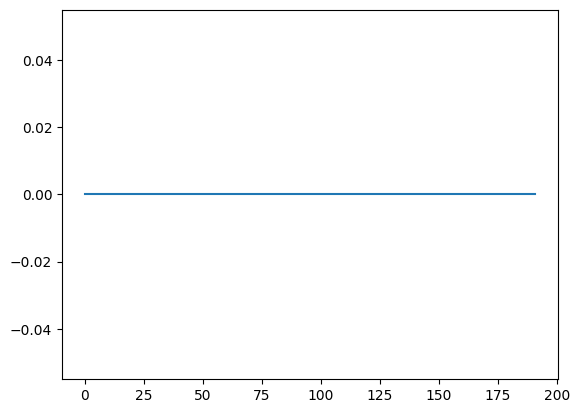

In [15]:
x.shape
plt.plot(x)

In [16]:
x = TwIST2(desampleConvolvedNoise=p_recorded, A=system_matrix, realSignal=p_recorded , tau=0.1, alpha=1, beta=1)

TypeError: TwIST2() got an unexpected keyword argument 'A'